# Introduccion a Pandas

1. Cargamos el data Set\
En esta sección, cargaremos el dataset de Iris en un DataFrame de Pandas y realizaremos un muestreo de los datos para obtener una idea de su estructura. También visualizaremos los datos utilizando gráficos.

In [8]:
pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt

# Enlace directo al archivo CSV de Iris en GitHub
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'

# Cargar el dataset de Iris en un DataFrame
df = pd.read_csv(url)

# Mostrar las primeras filas del DataFrame
print(df.head(10))

Matplotlib is building the font cache; this may take a moment.


   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
5           5.4          3.9           1.7          0.4  Setosa
6           4.6          3.4           1.4          0.3  Setosa
7           5.0          3.4           1.5          0.2  Setosa
8           4.4          2.9           1.4          0.2  Setosa
9           4.9          3.1           1.5          0.1  Setosa


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.shape

(150, 5)

2. Preprocesamiento y limpieza de datos

realizaremos operaciones de preprocesamiento y limpieza de los datos, como el manejo de valores nulos, ausentes, atípicos, etc.

- **Manejo de valores nulos**: Utilizamos el método `isnull()` junto con `sum()` para mostrar la cantidad de valores nulos en cada columna del DataFrame `df`. Los valores nulos representan la ausencia de datos en una columna.
- **Eliminar filas con valores nulos**: Utilizamos el método `dropna()` para eliminar las filas que contienen valores nulos en el DataFrame `df` y asignamos el resultado a un nuevo DataFrame llamado `df_cleaned`.
- **Manejo de valores atípicos**: Utilizamos el método `describe()` para obtener estadísticas descriptivas de los datos en el DataFrame `df`. Estas estadísticas nos ayudan a identificar valores atípicos, que son valores que se encuentran lejos de la mayoría de los otros valores en un conjunto de datos. Podemos utilizar estas estadísticas para definir un rango aceptable y eliminar las filas que contengan valores atípicos.

In [13]:
# Manejo de valores nulos
# Verificar la cantidad de valores nulos en cada columna
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [14]:
# Eliminar filas con valores nulos
df_cleaned = df.dropna()

In [15]:
# Manejo de valores atípicos
# Obtener estadísticas descriptivas
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


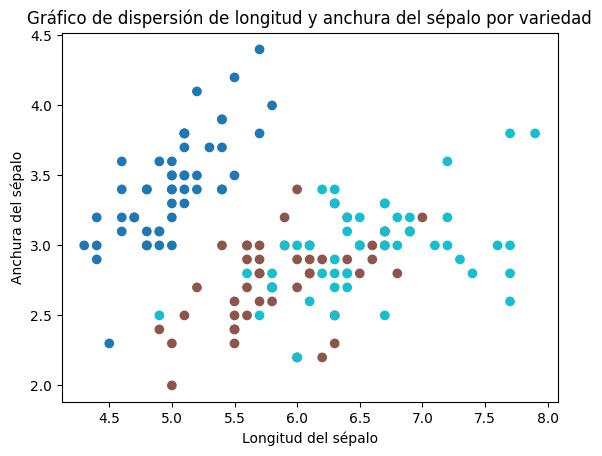

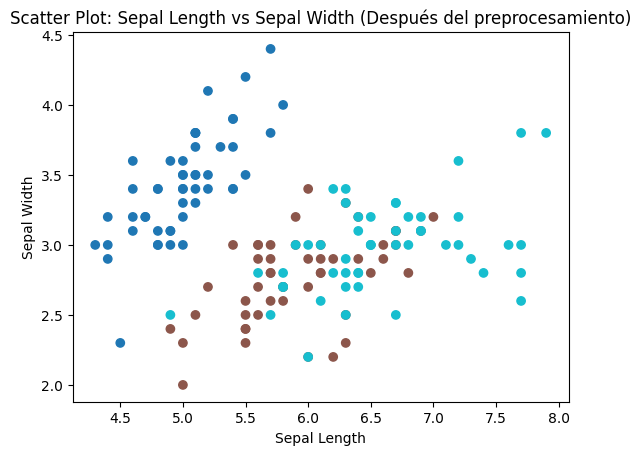

In [16]:

import matplotlib.pyplot as plt

# Importa las bibliotecas necesarias para asignar colores automáticamente
from matplotlib.colors import ListedColormap
import numpy as np

# Define las distintas variedades presentes en la columna "variety"
varieties = df['variety'].unique()

# Crea un mapeo de colores con una paleta de colores para el número de variedades
cmap = plt.get_cmap('tab10', len(varieties))

# Asigna un color único a cada variedad utilizando el mapeo de colores
colors = [cmap(i) for i in range(len(varieties))]
df['color'] = df['variety'].map(dict(zip(varieties, colors)))

# Crea el gráfico de dispersión usando los colores asignados
plt.scatter(df['sepal.length'], df['sepal.width'], c=df['color'])

# Etiqueta los ejes y muestra el gráfico
plt.xlabel('Longitud del sépalo')
plt.ylabel('Anchura del sépalo')
plt.title('Gráfico de dispersión de longitud y anchura del sépalo por variedad')
plt.show()


# Plot después del preprocesamiento
plt.scatter(df_cleaned['sepal.length'], df_cleaned['sepal.width'],c=df['color'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot: Sepal Length vs Sepal Width (Después del preprocesamiento)')
plt.show()

<Axes: >

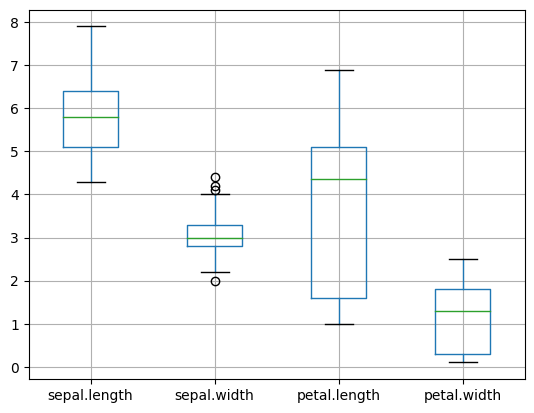

In [17]:
df.boxplot()

Outlires son valores que estan fuera de rango. Es decir, valores extremos o muy lejanos. Valores atipicos.

## Eliminar Outlires

In [18]:
def detect_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Llamamos a la función para cada columna numérica donde desees detectar outliers
columns_to_check = ["sepal.width"]
outliers_list = []
for col in columns_to_check:
    outliers = detect_outliers_iqr(df, col)
    outliers_list.append(outliers)

# Concatenamos todos los outliers encontrados en un solo DataFrame
outliers_df = pd.concat(outliers_list)

# Eliminamos los outliers del conjunto de datos original
data_cleaned = df.drop(outliers_df.index)

# Imprimimos la cantidad de outliers detectados
print("Número de outliers detectados:", len(outliers_df))

Número de outliers detectados: 4


<Axes: >

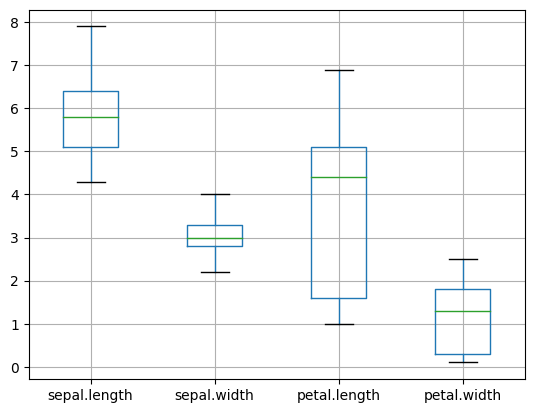

In [19]:
data_cleaned.boxplot()

## Ejemplo titanic

### Seaborn realiza graficos mas lindos

In [56]:
pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
data_titanic = pd.read_csv('csv/titanic.csv')

In [58]:
#Valores del data set
# Visualizar las primeras filas del DataFrame para tener una idea de los datos
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [59]:
# Obtener información básica sobre el conjunto de datos
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [60]:
# Obtener estadísticas descriptivas de las columnas numéricas
data_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [61]:
# Obtener el número de valores faltantes en cada columna
data_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [62]:
# Rellenar los valores faltantes en la columna 'Age' con la mediana
data_titanic['Age'].fillna(data_titanic['Age'].median(), inplace=True)

# Rellenar los valores faltantes en la columna 'Embarked' con el valor más frecuente
most_frequent_embarked = data_titanic['Embarked'].mode()[0]
data_titanic['Embarked'].fillna(most_frequent_embarked, inplace=True)

In [63]:
# Eliminar la columna 'Cabin' ya que tiene muchos valores faltantes y puede no ser relevante para el análisis
data_titanic.drop('Cabin', axis=1, inplace=True)

# Eliminar otras columnas irrelevantes o poco útiles para nuestro análisis
#data.drop(['Ticket', 'Name'], axis=1, inplace=True) # Puedes decidir si deseas eliminar estas columnas también

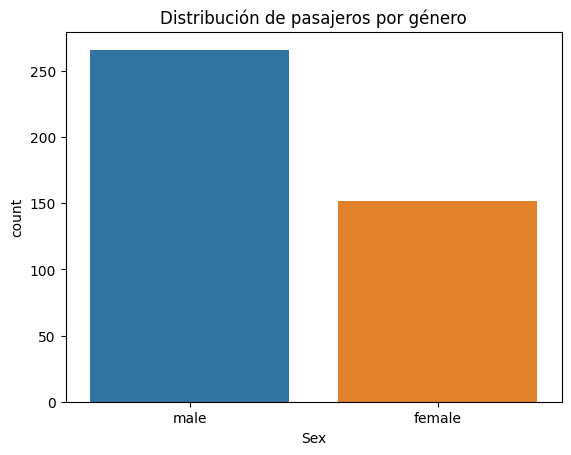

In [64]:
# Visualizar la distribución de pasajeros por género
sns.countplot(x='Sex', data=data_titanic)
plt.title('Distribución de pasajeros por género')
plt.show()

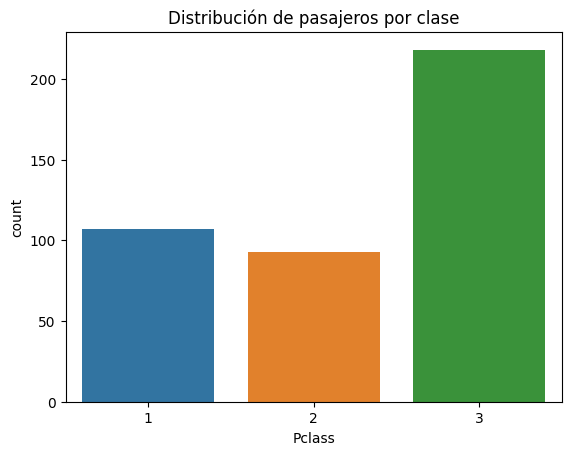

In [65]:
# Visualizar la distribución de pasajeros por clase
sns.countplot(x='Pclass', data=data_titanic)
plt.title('Distribución de pasajeros por clase')
plt.show()

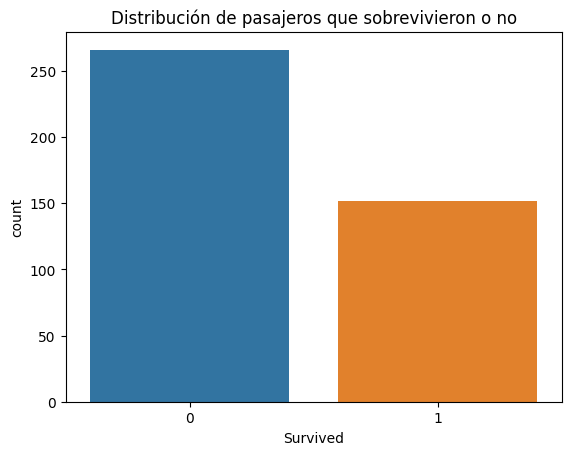

In [66]:
# Visualizar la distribución de pasajeros que sobrevivieron o no
sns.countplot(x='Survived', data=data_titanic)
plt.title('Distribución de pasajeros que sobrevivieron o no')
plt.show()

In [67]:
# Calcular la tasa de supervivencia por género
survival_rate_by_gender = data_titanic.groupby('Sex')['Survived'].mean()
print(survival_rate_by_gender)

Sex
female    1.0
male      0.0
Name: Survived, dtype: float64


In [68]:
# Calcular la tasa de supervivencia por clase
survival_rate_by_class = data_titanic.groupby('Pclass')['Survived'].mean()
print(survival_rate_by_class)

Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64


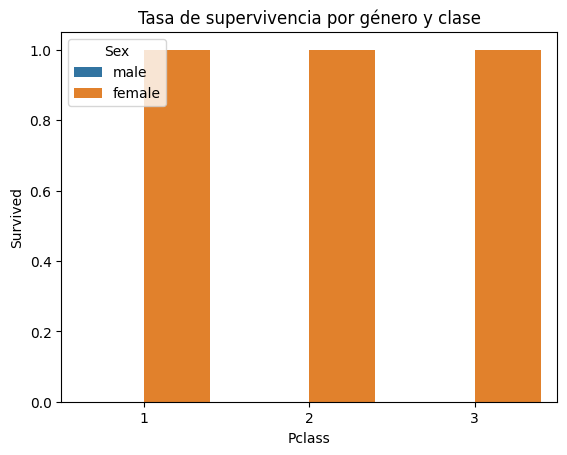

In [69]:
# Visualizar la tasa de supervivencia por género y clase
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=data_titanic)
plt.title('Tasa de supervivencia por género y clase')
plt.show()

In [70]:
# Calcular la edad promedio de los pasajeros que sobrevivieron y los que no
average_age_survived = data_titanic.groupby('Survived')['Age'].mean()
print(average_age_survived)

Survived
0    29.522218
1    29.734145
Name: Age, dtype: float64
